In [908]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

In [909]:
df = pd.read_csv("xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [910]:
df = df.drop(['NationalITy', 'PlaceofBirth', 'Relation','ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis = 1)

In [911]:
print(df.columns)

Index(['gender', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester',
       'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [912]:
df['Class'].loc[df.Class == 'L'] = 0.0
df['Class'].loc[df.Class == 'M'] = 1.0
df['Class'].loc[df.Class == 'H'] = 2.0
df.head()

/Users/kpham/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,gender,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,A,IT,F,15,16,2,20,Under-7,1
1,M,lowerlevel,G-04,A,IT,F,20,20,3,25,Under-7,1
2,M,lowerlevel,G-04,A,IT,F,10,7,0,30,Above-7,0
3,M,lowerlevel,G-04,A,IT,F,30,25,5,35,Above-7,0
4,M,lowerlevel,G-04,A,IT,F,40,50,12,50,Above-7,1


In [913]:
continuous_subset = df
continuous_subset = continuous_subset.drop(['Class'], axis = 1)

continuous_subset['gender'] = np.where(df['gender']=='M',1,0)

continuous_subset['StageID'].loc[continuous_subset.StageID == 'lowerlevel'] = 0 
continuous_subset['StageID'].loc[continuous_subset.StageID == 'MiddleSchool'] = 1
continuous_subset['StageID'].loc[continuous_subset.StageID == 'HighSchool'] = 2

continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-01'] = 0
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-02'] = 1
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-03'] = 2
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-04'] = 3
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-05'] = 4
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-06'] = 5
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-07'] = 6
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-08'] = 7
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-09'] = 8
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-10'] = 9
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-11'] = 10
continuous_subset['GradeID'].loc[continuous_subset.GradeID == 'G-12'] = 11

continuous_subset['SectionID'].loc[continuous_subset.SectionID == 'A'] = 0
continuous_subset['SectionID'].loc[continuous_subset.SectionID == 'B'] = 1
continuous_subset['SectionID'].loc[continuous_subset.SectionID == 'C'] = 2

continuous_subset['Topic'].loc[continuous_subset.Topic == 'IT'] = 0
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Math'] = 1 
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Arabic'] = 2
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Science'] = 3
continuous_subset['Topic'].loc[continuous_subset.Topic == 'English'] = 4
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Quran'] = 5
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Spanish'] = 6 
continuous_subset['Topic'].loc[continuous_subset.Topic == 'French'] = 7
continuous_subset['Topic'].loc[continuous_subset.Topic == 'History'] = 8
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Biology'] = 9
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Chemistry'] = 10 
continuous_subset['Topic'].loc[continuous_subset.Topic == 'Geology'] = 11

continuous_subset['Semester'] = np.where(df['Semester']=='F',1,0)
continuous_subset['StudentAbsenceDays'] = np.where(df['StudentAbsenceDays']=='Under-7',1,0)

/Users/kpham/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [914]:
continuous_subset.head()

,gender,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,1,0,3,0,0,1,15,16,2,20,1
1,1,0,3,0,0,1,20,20,3,25,1
2,1,0,3,0,0,1,10,7,0,30,0
3,1,0,3,0,0,1,30,25,5,35,0
4,1,0,3,0,0,1,40,50,12,50,0


In [915]:
y = np.array(df['Class']).astype('float64')
X = np.array(continuous_subset).astype('float64')
X.shape

(480, 11)

## Logistic Regression

In [917]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(
         X, y)

# Fit the model on the training data.
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Print the accuracy from the training data.
print(accuracy_score(lr.predict(X_train), y_train))

0.741666666667


## Random Forest Classifier

"Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the"
https://en.wikipedia.org/wiki/Random_forest
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit_transform

A random forest classifier.
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [926]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

yf = rf.predict(X_test)

accuracy_score = rf.score(X_test, y_test)
accuracy_score

0.7416666666666667

In [927]:
importances = rf.feature_importances_
importances

array([ 0.02626809,  0.0154317 ,  0.03910209,  0.01356063,  0.05268989,
        0.01850011,  0.21576673,  0.2176925 ,  0.16377459,  0.11847962,
        0.11873406])

Feature ranking:
1. feature 7 (0.217693)
2. feature 6 (0.215767)
3. feature 8 (0.163775)
4. feature 10 (0.118734)
5. feature 9 (0.118480)
6. feature 4 (0.052690)
7. feature 2 (0.039102)
8. feature 0 (0.026268)
9. feature 5 (0.018500)
10. feature 1 (0.015432)
11. feature 3 (0.013561)


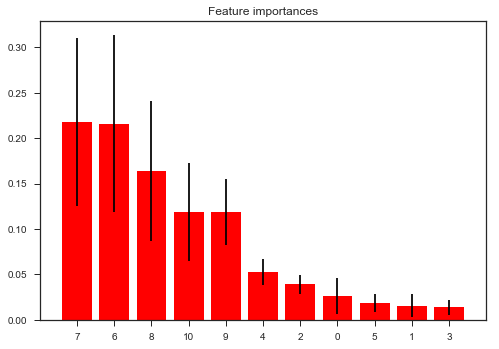

In [928]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

"By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

It is also possible to show a subset of variables or plot different variables on the rows and columns."
http://seaborn.pydata.org/generated/seaborn.pairplot.html

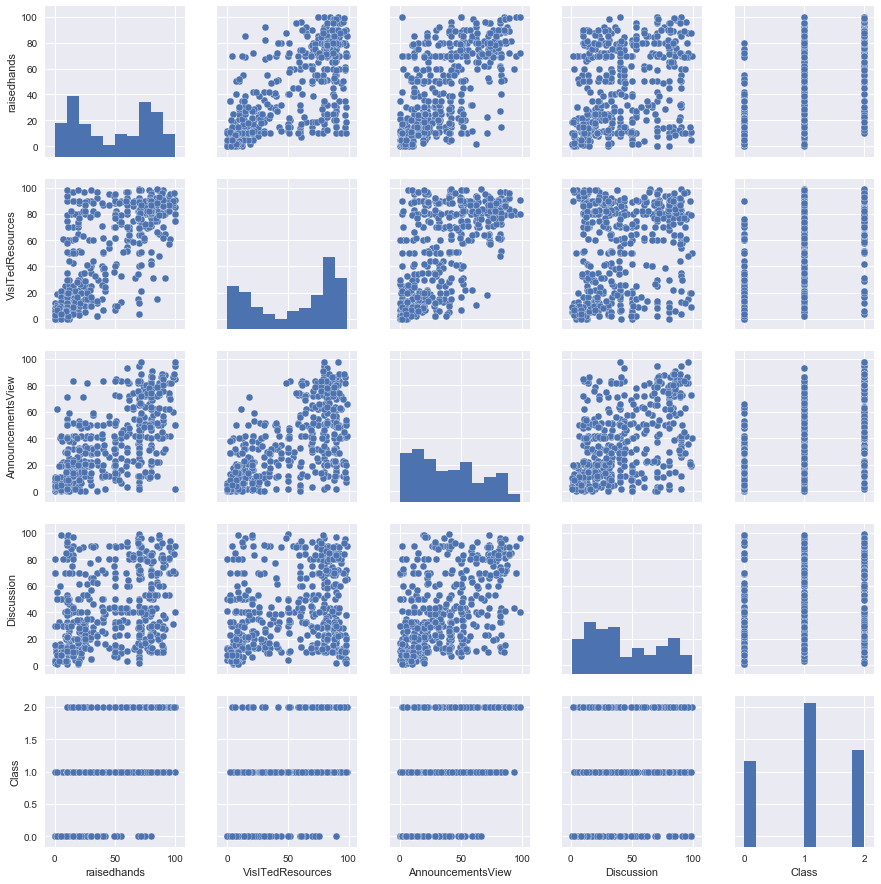

In [929]:
sns.set()
sns.pairplot(df)
plt.show()

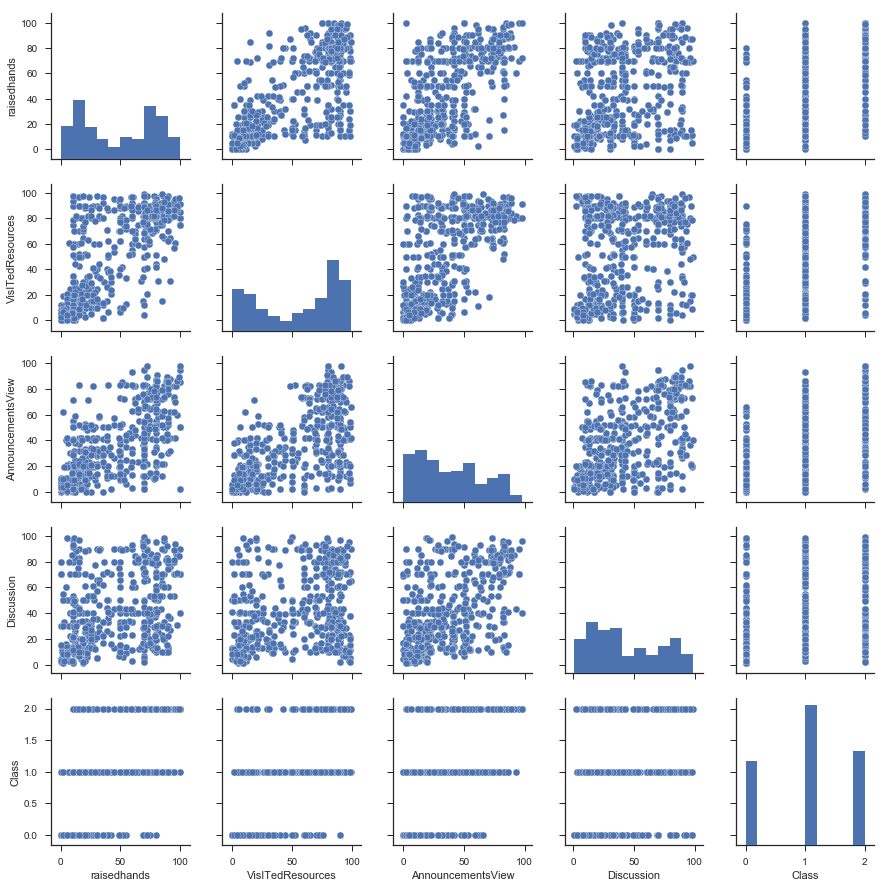

In [930]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
plt.show()

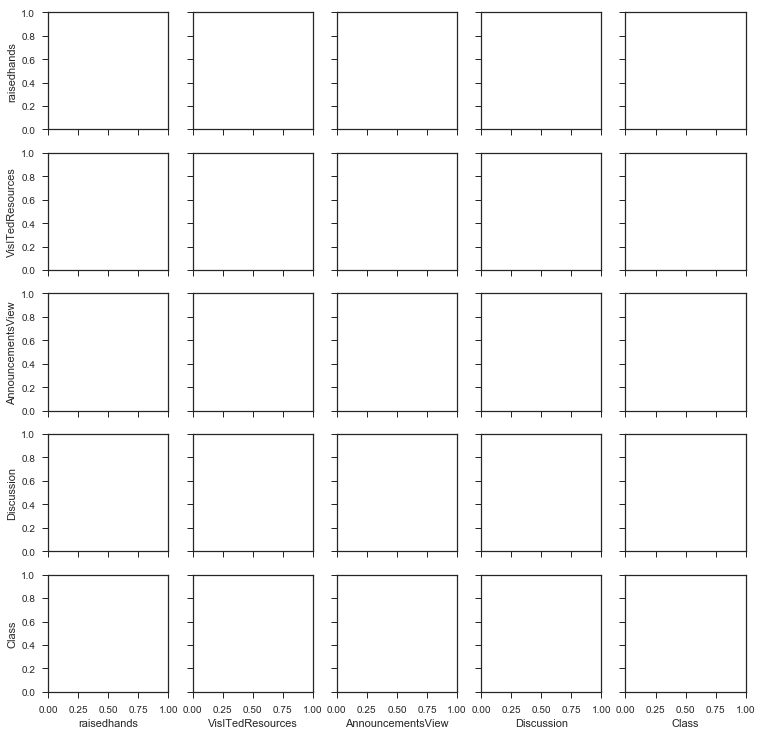

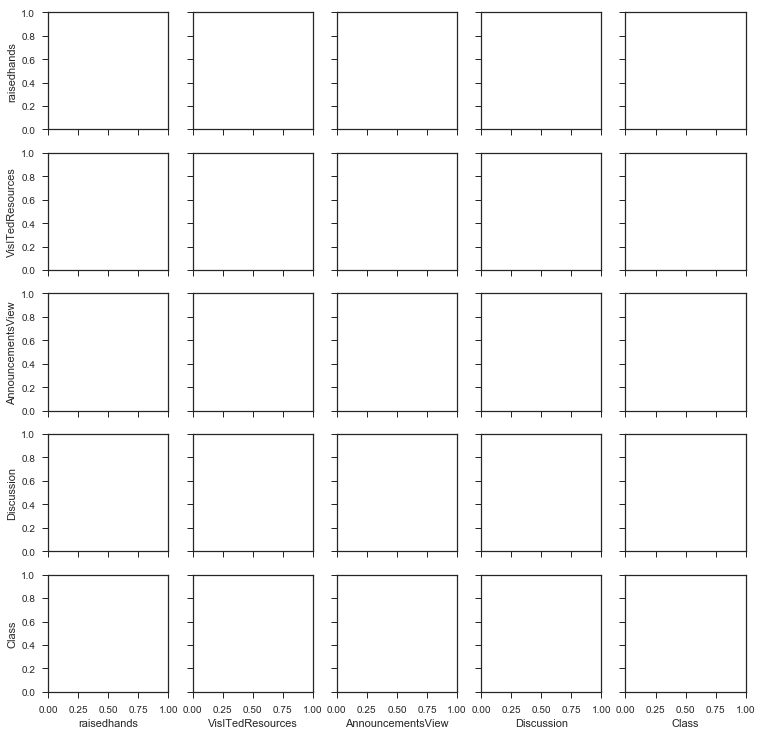

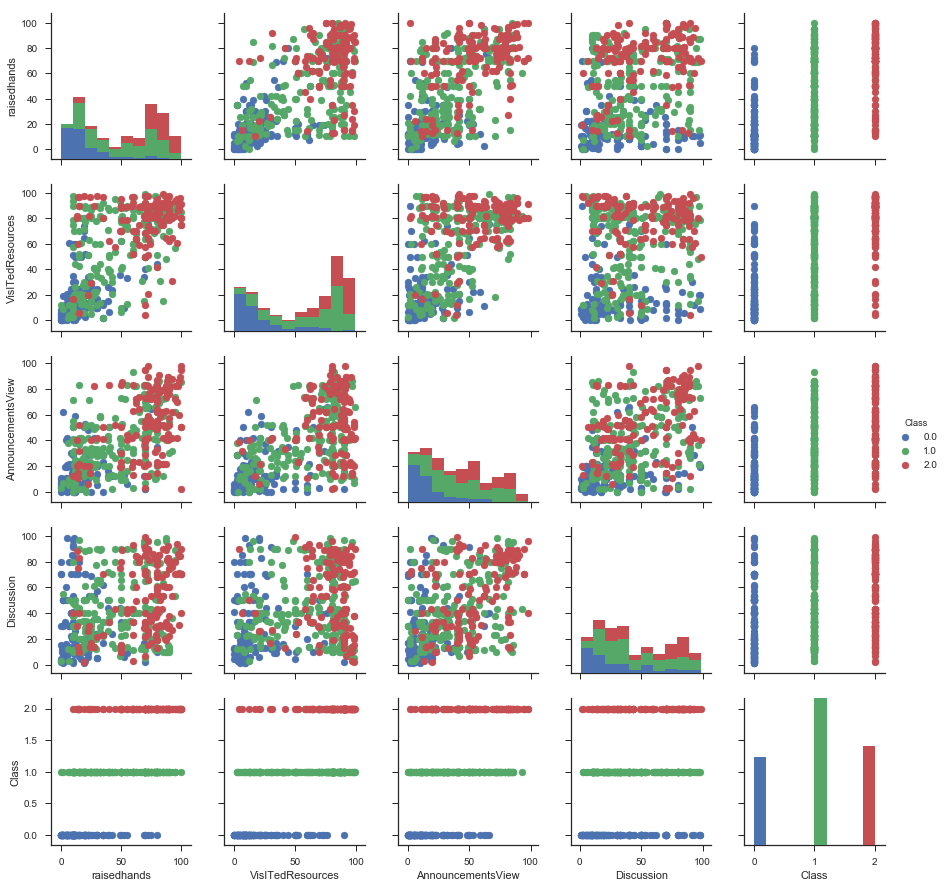

In [933]:
g = sns.PairGrid(df, hue="Class")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()